In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import uuid

In [7]:
cam_pic = cv2.VideoCapture(0)
while cam_pic.isOpened():
    ret, frame = cam_pic.read()

   
    if not ret:
        print("Failed to grab frame")
        break

    cv2.imshow("Scanning Your Face", frame)
    key = cv2.waitKey(1)
    if key & 0xFF == ord('q'):
        break

cam_pic.release()
cv2.destroyAllWindows()

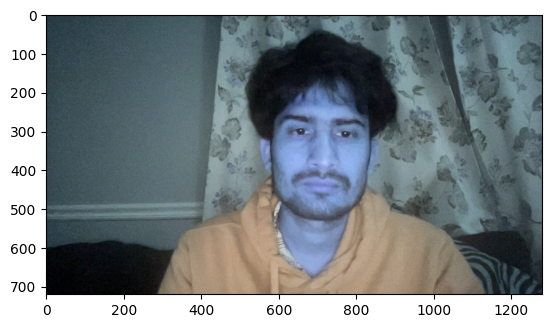

In [8]:
plt.imshow(frame)

In [9]:
frame.shape

(720, 1280, 3)

In [10]:
 frame = frame[100:600, 475:900, :]

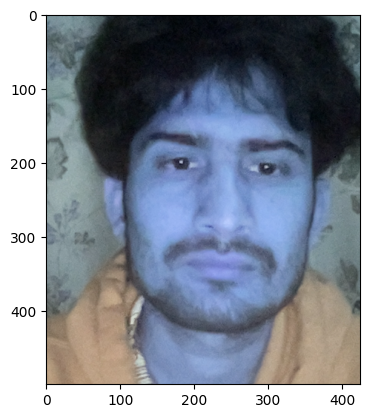

In [11]:
plt.imshow(frame)

In [1]:
#create a frame 

center = (687, 350)  
axes = (212, 250)    
angle = 0            

# Dash parameters
dash_angle_step = 15  
dash_length_angle = 10  

cam_pic = cv2.VideoCapture(0)
while cam_pic.isOpened():
    ret, frame = cam_pic.read()

    if not ret:
        break

    for theta in range(0, 360, dash_angle_step + dash_length_angle):
        start_angle = theta
        end_angle = theta + dash_length_angle
        cv2.ellipse(frame, center, axes, angle, start_angle, end_angle, (0, 255, 0), 2)

    cv2.imshow("Scanning Your Face", frame)
    
    key = cv2.waitKey(1)
    if key & 0xFF == ord('q'):
        break

cam_pic.release()
cv2.destroyAllWindows()


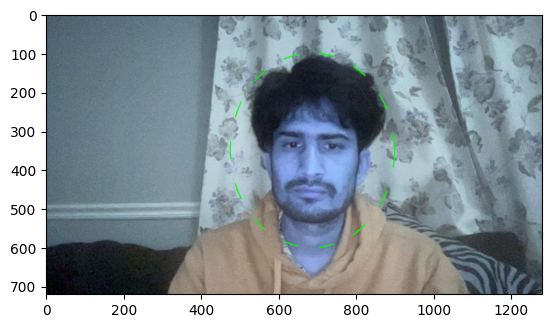

In [4]:
plt.imshow(frame)

In [37]:
#Capturing image inside region.

center = (695, 330)  
axes = (290, 290)    
angle = 0            

# Dash parameters
dash_angle_step = 15  
dash_length_angle = 12  

# Open the video capture
cam_pic = cv2.VideoCapture(0)
while cam_pic.isOpened():
    ret, frame = cam_pic.read()

    if not ret:
        break

    for theta in range(0, 360, dash_angle_step + dash_length_angle):
        start_angle = theta
        end_angle = theta + dash_length_angle
        cv2.ellipse(frame, center, axes, angle, start_angle, end_angle, (0, 255, 0), 2)

    cv2.imshow("Scanning Your Face", frame)
    #frame = frame[100:600, 500:880, :]
    frame = frame[150:575, 500:880, :]
    
    key = cv2.waitKey(1)
    if key & 0xFF == ord('q'):
        break

cam_pic.release()
cv2.destroyAllWindows()


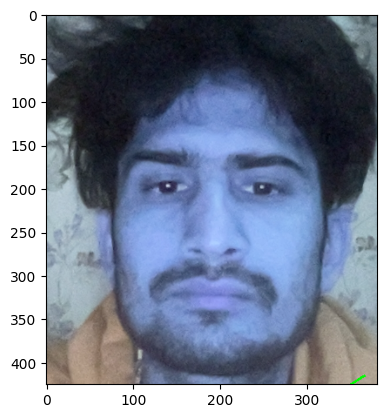

In [38]:
plt.imshow(frame)

In [1]:
##Collect Images

In [2]:
#create a path and folder to store images
anchor_path = os.path.join('data', 'anchor')
positive_path = os.path.join('data', 'positive')
negative_path = os.path.join('data', 'negative')


In [ ]:
os.makedirs(anchor_path)
os.makedirs(positive_path)
os.makedirs(negative_path)

In [3]:
## Capturing Positive and Anchor Images 

center = (695, 330)  
axes = (290, 290)    
angle = 0            

# Dash parameters
dash_angle_step = 15  
dash_length_angle = 12  

# Open the video capture
cam_pic = cv2.VideoCapture(0)
while cam_pic.isOpened():
    ret, frame = cam_pic.read()

    if not ret:
        break

    for theta in range(0, 360, dash_angle_step + dash_length_angle):
        start_angle = theta
        end_angle = theta + dash_length_angle
        cv2.ellipse(frame, center, axes, angle, start_angle, end_angle, (0, 255, 0), 2)

    cv2.imshow("Scanning Your Face", frame)
    #frame = frame[100:600, 500:880, :]
    frame = frame[150:575, 500:880, :]
    key = cv2.waitKey(1) & 0xFF  
    if key == ord('a'):
        imagename = os.path.join(anchor_path, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imagename, frame)
    elif key == ord('p'):
        image_name = os.path.join(positive_path, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(image_name, frame)
    elif key == ord('q'):
        break

cam_pic.release()
cv2.destroyAllWindows()

In [13]:
#Save the downloaded negative images to the negative folder

for dir in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', dir)):
        old_path = os.path.join('lfw', dir, file)
        new_neg_path = os.path.join(negative_path, file)
        os.replace(old_path, new_neg_path)